In [31]:
import pandas as pd
import os
from pprint import pprint

## 定义一些需要用到的函数：比如打印前五个。

In [32]:
root_folder = "C:/Users/Administrator/Desktop/03.31"
f = lambda x: os.path.join(root_folder, x)
printf = lambda x: x[:5] if len(x)> 10 else x

## 读取 Salaries.csv

In [33]:
salaries = pd.read_csv(f('Salaries.csv'))
printf(salaries)

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [34]:
all_player = salaries['playerID'].unique()
print(len(all_player))
print(all_player)

5155
['barkele01' 'bedrost01' 'benedbr01' ... 'travide01' 'riverfe01'
 'rossjo01']


## 创建无限循环生成器，循环生成样式

In [35]:
from itertools import cycle
from random import shuffle
def yielder(members):
    if not isinstance(members, (list, tuple)):
        raise TypeError("Not a list or tuple!")
    shuffle(members)
    infinite_list = cycle(members) 
    for i in infinite_list:
        yield i
        
line_style = yielder(['-.', ':', '--', '-'])
colors = yielder(['b', 'g', 'r', 'c', 'm', 'y', 'k'])
markers = yielder(['.', ',', 'o', 'v', '^','<', '>', '1', '2', '3', '4', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_'])
 

## 另一种pyplot内置方法 

In [36]:
from cycler import cycler

li = ['-.', ':', '--', '-']
co = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
ma = ['.', ',', 'o', 'v', '^','<', '>', '1', '2', '3', '4', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_']

def make_style():
    shuffle(li)
    shuffle(co)
    shuffle(ma)

    line_style2 = cycler(linestyle=li)
    colors2 = cycler(color=co)
    markers2 = cycler(marker=ma)

    style = line_style2 * colors2 * markers2
    
    return style


## 以下函数查看某个球员的年薪变化：

In [37]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def show_salary(*player_ids):    
       
    
    if not set(player_ids).issubset(set(all_player)):
        raise TypeError("The player ID specified are not all in the table! ")
    
    fig = plt.figure()
    ax1 = fig.add_subplot(1,1,1)       
    tick_spacing = 2
    ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    plt.xlabel('Year')
    plt.ylabel('Salary')
    styler = make_style()
    ax1.set_prop_cycle(styler)
    
    for i in player_ids:
        sub_table = salaries[salaries['playerID'] == i]    
        sub_table = sub_table[sub_table['yearID'] != 0]    
        sub_table = sub_table.sort_values(by='yearID') 
        x = [str(i) for i in sub_table['yearID']]
        y = list(sub_table['salary']) 
        new = pd.DataFrame(y, index=x)
        # ax1.plot(new, marker=r'%s' % next(markers), color=u'%s' % next(colors), linestyle=next(line_style), label=str(i))
        ax1.plot(new)
    #plt.legend()
    plt.show()
 

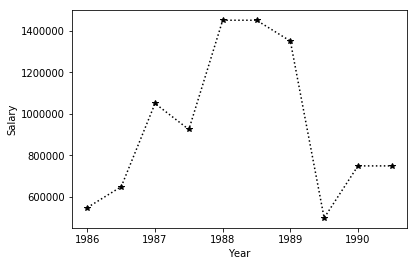

In [38]:
show_salary('bedrost01')

## 到这个网站去搜寻缩写含义 http://www.softball.com.cn/portal.php?mod=view&aid=113

打席（PA）：一名打者上场打击的次数，包括牺牲打，保送和触身球都会被记录在打席之中。一名大联盟的主力球员一个赛季一般会有500个打席左右。

打数（AB）：一名打者上场打击的次数，但是并不包括牺牲打，保送，触身球和野手犯规，因此打数必然小于打席。

得分（R）：一名球员在上垒之后，在这半局结束前按顺序绕垒一圈回到本垒便得一分。而这也是衡量一场比赛胜败的唯一数据。一名优秀的大联盟打者，一个赛季一般都可以跑回100分。

安打（H）：安全打击的简称，包括一垒打，二垒打，三垒打和全垒打。一名顶级的大联盟打者一个赛季能取得200支安打。如果生涯能够取得3000安打的里程碑则被认为是肯定的名人堂球员。


## 得到解释后创建解释字典。

{英文术语: [中文翻译，解释]}

In [47]:
with open(f('规则.txt')) as file:
    content = file.read()

In [48]:
import re
letters = re.compile(r'[A-Z]')

In [99]:
rules = content.split('\n')
rules = [i for i in rules if re.search(letters, i)]
printf(rules)

['打席（PA）：一名打者上场打击的次数，包括牺牲打，保送和触身球都会被记录在打席之中。一名大联盟的主力球员一个赛季一般会有500个打席左右。',
 '打数（AB）：一名打者上场打击的次数，但是并不包括牺牲打，保送，触身球和野手犯规，因此打数必然小于打席。',
 '得分（R）：一名球员在上垒之后，在这半局结束前按顺序绕垒一圈回到本垒便得一分。而这也是衡量一场比赛胜败的唯一数据。一名优秀的大联盟打者，一个赛季一般都可以跑回100分。',
 '安打（H）：安全打击的简称，包括一垒打，二垒打，三垒打和全垒打。一名顶级的大联盟打者一个赛季能取得200支安打。如果生涯能够取得3000安打的里程碑则被认为是肯定的名人堂球员。',
 '全垒打（HR）：全垒打分两种，一为场内全垒打，即击出的球还在场内，但是在防守球员将球传回来之前绕垒一圈，另一种为场外全垒打，即为将球击出全垒打墙以外。一名优秀的大联盟打者一个赛季能够取得30支以上的全垒打。如果生涯取得500支全垒打的里程碑则被认为是名人堂球员。但是在死球时代（1920年以前），因为用球不同，击出全垒打比现在困难很多，所以那个时代的全垒打数据与今日有很大不同。']

In [100]:
tr_dic = {}
info_dic = {}

for each_rule in rules:
    first_split = each_rule.split('（')
    chinese = first_split[0].strip()
    second_split = first_split[1].split('）：')
    english = second_split[0].strip()
    explanation = second_split[1].strip()
    tr_dic.update({english: chinese})
    info_dic.update({chinese: explanation})
    
pprint(tr_dic)

{'A': '助攻数',
 'AB': '打数',
 'BA': '打击率',
 'BB': '保送',
 'BB/9': '保送比',
 'BF': '面对打者的数量',
 'BK': '投手犯规',
 'CG': '完投',
 'CH': '守备机会',
 'CS': '盗垒失败',
 'E': '守备失误',
 'ER': '自责分',
 'ERA': '防御率',
 'ERA+': '调整防御率',
 'FLD%': '守备率',
 'GDP': '滚地球双杀打',
 'H': '被安打数',
 'H/9': '安打比',
 'HBP': '触身球',
 'HR': '被击出的全垒打数',
 'HR/9': '全垒打比',
 'IBB': '故意四坏球',
 'IP': '投球局数',
 'L': '败投',
 'OBP': '上垒率',
 'OPS': '攻击指数',
 'OPS+': '调整攻击指数',
 'PA': '打席',
 'PO': '封杀',
 'R': '失分',
 'RBI': '打点',
 'SB': '盗垒',
 'SF': '牺牲打',
 'SH': '牺牲触击',
 'SHO': '完封',
 'SLG': '长打率',
 'SO': '三振',
 'SO/9': '三振比',
 'SO/BB': '三振保送比',
 'SV': '救援点',
 'TB': '垒打数',
 'W': '胜投',
 'W-L%': '胜率',
 'WAR': '额外胜利数',
 'WHIP': '平均每局被击出的安打数和保送数'}


## 获取每个球员在不同表之中的记录

In [101]:
batting = pd.read_csv(f('Batting.csv'))
batting_post = pd.read_csv(f('BattingPost.csv'))
fielding = pd.read_csv(f('Fielding.csv'))
pitching = pd.read_csv(f('Pitching.csv'))
pitching_post = pd.read_csv(f('PitchingPost.csv'))

In [102]:
def find_player_in_table(table, player):
    tmp_table = table[table['playerID'] == player] 
    chi_col = [tr_dic.get(i, i) for i in tmp_table.columns]
    chi_col = tmp_table.columns    
    tmp_table = pd.DataFrame(tmp_table, columns=chi_col).fillna(0)
    return tmp_table 

In [103]:
def find_player_in_all_tables(player):
    all_tables = [salaries, batting, batting_post, fielding, pitching, pitching_post]
    return [find_player_in_table(i, player) 
            for i in all_tables]        

In [125]:
def BA(table, player):
    '''
    打击率 BA= 安打数H / 打数AB
    '''     
    dataframes = table[table['playerID'] == player]     
    return dataframes['H'] / dataframes['AB']
 
BA(batting_post, 'benedbr01')

4510    0.25
dtype: float64

In [133]:
def OBP(table, player):
    """OBP = (安打数H + 保送数 BB+ 触身球数HBP)/(打数AB + 保送数 BB+ 触身球数HBP + 牺牲打数SF)"""
    dataframes = table[table['playerID'] == player]
    return ((dataframes['H'] + dataframes['BB'] + dataframes['HBP'])/ 
            (dataframes['AB'] + dataframes['BB'] + dataframes['HBP'] + dataframes['SF']))
    

In [134]:
BA(batting_post,'bedrost01')
OBP(batting_post, 'benedbr01')

4510    0.4
dtype: float64